---
title: "SWD Properties"
---

## Setup

In [1]:
#| hide
import polars as pl
from ids_finder.utils.basic import load_catalog

from beforerr.r import py2rpy_polars
import rpy2.robjects as robjects

from ids_finder.pipelines.project.pipeline import process_events_l2

In [2]:
#| hide
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

In [3]:
catalog = load_catalog()

[12/01/23 16:44:25] WARNING  /Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/ke ]8;id=489250;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/astropy/logger.py\logger.py]8;;\:]8;id=530937;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/astropy/logger.py#205\205]8;;\
                             dro_datasets/polars/lazy_polars_dataset.py:14: KedroDeprecationWarning:               
                             'AbstractVersionedDataSet' has been renamed to                                        
                             'AbstractVersionedDataset', and the alias will be removed in Kedro                    
                             0.19.0                                                                                
                               from kedro.io.core import (                                                         
                                                                                                                   

Connect `python` with `R` kernel

In [4]:
r = robjects.r
r.source('utils.R')

conv_pl = py2rpy_polars()

                    WARNING  R[write to console]:                                                  ]8;id=21277;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py\callbacks.py]8;;\:]8;id=30963;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py#124\124]8;;\
                             Attaching package: ‘dplyr’                                                            
                                                                                                                   
                                                                                                                   

                    WARNING  R[write to console]: The following objects are masked from            ]8;id=667086;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py\callbacks.py]8;;\:]8;id=182067;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py#124\124]8;;\
                             ‘package:stats’:                                                                      
                                                                                                                   
                                 filter, lag                                                                       
                                                                                                                   
                                                                                                                   

                    WARNING  R[write to console]: The following objects are masked from            ]8;id=316806;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py\callbacks.py]8;;\:]8;id=902669;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py#124\124]8;;\
                             ‘package:base’:                                                                       
                                                                                                                   
                                 intersect, setdiff, setequal, union                                               
                                                                                                                   
                                                                                                                   

## Processing datasets

In [5]:
all_events_l1 : pl.DataFrame = catalog.load('events.l1.ALL_sw_ts_1s_tau_60s').collect()
JNO_events_l1 = all_events_l1.filter(pl.col('sat') == 'JNO')
other_events_l1 = all_events_l1.filter(pl.col('sat') != 'JNO')
all_events_l2 = all_events_l1.pipe(process_events_l2)
%R -i all_events_l2 -c conv_pl


%R -i JNO_events_l1 -c conv_pl
%R -i all_events_l1 -c conv_pl
%R -i other_events_l1 -c conv_pl

[12/01/23 16:44:26] INFO     Loading data from 'events.l1.ALL_sw_ts_1s_tau_60s'                 ]8;id=346464;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=525055;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (LazyPolarsDataset)...                                                                

Some extreme values are present in the data. We will remove them.

In [6]:
NVARS = ['d_star', 'L_mn', 'L_mn_norm', 'j0', 'j0_norm', 'duration', 'v_mn']
DISPLAY_VARS = ['time', 'sat'] + NVARS


def check_candidates(df):
    if isinstance(df, pl.LazyFrame):
        df = df.collect()
    return df.select(NVARS).describe()

check_candidates(all_events_l1)

describe,d_star,L_mn,L_mn_norm,j0,j0_norm,duration,v_mn
str,f64,f64,f64,f64,f64,str,f64
"""count""",280740.0,280740.0,280740.0,280740.0,280740.0,"""280740""",280740.0
"""null_count""",0.0,0.0,524.0,0.0,524.0,"""0""",0.0
"""mean""",0.919975,2368.171241,20.579939,2.584397,0.079965,"""0:00:07.200559…",329.576546
"""std""",0.917593,1597.426008,15.017044,3.960893,0.105744,null,107.559275
"""min""",0.025615,40.088585,0.227812,0.048355,0.001512,"""0:00:02""",10.022146
"""25%""",0.32078,1347.811045,11.000497,0.820266,0.030138,"""0:00:04""",267.769087
"""50%""",0.643556,1946.797109,16.804255,1.640207,0.054373,"""0:00:06""",332.027701
"""75%""",1.200596,2916.708805,25.68928,3.093725,0.095973,"""0:00:09""",393.696592
"""max""",17.98526,32939.36824,358.253288,309.842292,9.634978,"""0:00:56""",864.808497


In [7]:
inspect_df = all_events_l2[NVARS]
inspect_df.describe()

describe,d_star,L_mn,L_mn_norm,j0,j0_norm,duration,v_mn
str,f64,f64,f64,f64,f64,str,f64
"""count""",230.0,230.0,230.0,230.0,230.0,"""230""",230.0
"""null_count""",19.0,19.0,19.0,19.0,19.0,"""19""",19.0
"""mean""",0.877702,2532.137047,20.405935,2.524317,0.092205,"""0:00:07.666787…",330.599885
"""std""",0.403323,511.717175,5.956418,1.246758,0.042522,null,37.204692
"""min""",0.110787,1817.802972,6.912295,0.234345,0.048246,"""0:00:06.390404…",255.313631
"""25%""",0.726833,2184.78267,18.368551,1.988046,0.069698,"""0:00:06.831121…",304.836154
"""50%""",0.941395,2398.748205,21.023224,2.779766,0.078657,"""0:00:07.195599…",329.466847
"""75%""",1.129473,2751.132373,24.169994,3.241188,0.092763,"""0:00:08.172248…",353.839774
"""max""",1.775508,4249.960369,37.964232,5.746615,0.298918,"""0:00:11.522727…",444.819813


## Plotting function

Plotting function for Level 1 data.

Similar to the `geom_bin2d` function, but with added functionality

- Normalize the data to every x-axis value
- Add peak values
- Add mean values with error bars

### Plotting function for Level 2 averaged data.

In [8]:
%%R
# Utility function for plotting
plot_util <- function(df, x_var, y_vars, xlab, ylabs, color="sat", linetype="sat") {
  # Initialize an empty list for storing plots
  plots <- list()
  
  # Iterate over each y_var and its corresponding label
  for (i in seq_along(y_vars)) {
    y_var <- y_vars[i]
    y_lab <- ylabs[i]
    
    # Create plot for the current y variable
    p <- ggplot(df, aes(x = .data[[x_var]], y = .data[[y_var]], color = .data[[color]], linetype = .data[[linetype]])) +
      geom_line() + geom_point() +
      labs(y = y_lab, x = x_var, color = "Satellites", linetype = "Satellites") +
      theme_pubr(base_size = 16) +
      theme(legend.text = element_text(size = 16)) +
      scale_color_okabeito(palette = "black_first")

    # Apply modifications specific to the position of the plot
    p <- ggpar(p, legend = "none")
    if (i != length(y_vars)) {
      p <- ggpar(p, xlab = FALSE)
    }
    if (i == length(y_vars)) {
      p <- ggpar(p, xlab = xlab)
    }
    if (i == 1) {
      p <- ggpar(p, legend = "top")
    }
    
    # Add the plot to the list
    plots[[i]] <- p
  }

  # Combine all the plots vertically
  combined_plot <- wrap_plots(plots) + plot_layout(ncol = 1)

  return(combined_plot)
}


### Histogram

In [9]:
%%R
plot_limited_histogram <- function(df, x, x_lim, bins, facet_var) {
    data <- df %>%
        filter(!!sym(x) >= x_lim[1], !!sym(x) <= x_lim[2])

    p <- gghistogram(data, x = x, y="density", color = "sat", bins = bins, facet.by = facet_var)
    
    return(p)
}   

## $\Delta B_l$

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


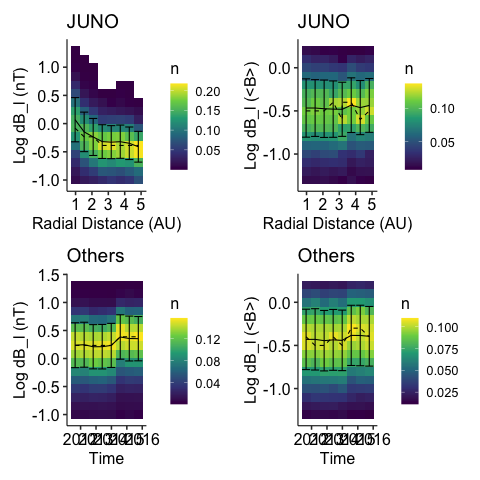

In [182]:
%%R
y <- "dB_l"
ylab <- "Log dB_l (nT)"
y_lim <- c(0.1,30)
p1 <- plot_dist(y=y, ylab=ylab, y_lim = y_lim)
save_plot("dB_l_dist")

y <- "dB_l_norm"
ylab <- "Log dB_l (<B>)"
y_lim <- c(0.05,2)
p2 <- plot_dist(y=y, ylab=ylab, y_lim = y_lim)
save_plot("dB_l_N1_dist")

p1 | p2

## Overview

In [ ]:
thresold = 0.2

def temp_plot(l1_df, y="j0_norm"):
    return l1_df.pipe(process_events_l2).hvplot(
        x="time", y=y, by="sat", hover_cols=["id_count"], width=300, height=300, legend=False
    )

direction_col = pl.col('k_x').abs()

((
    all_events_l1.pipe(temp_plot, y="j0_norm")
    + all_events_l1.filter(direction_col > thresold).pipe(temp_plot, y="j0_norm")
    + all_events_l1.filter(direction_col < thresold).pipe(temp_plot, y="j0_norm")
) + (
    all_events_l1.pipe(temp_plot, y="L_mn_norm")
    + all_events_l1.filter(direction_col > thresold).pipe(temp_plot, y="L_mn_norm")
    + all_events_l1.filter(direction_col < thresold).pipe(temp_plot, y="L_mn_norm")
)).cols(3)

:Layout
   .NdOverlay.I   :NdOverlay   [sat]
      :Curve   [time]   (j0_norm,id_count)
   .NdOverlay.II  :NdOverlay   [sat]
      :Curve   [time]   (j0_norm,id_count)
   .NdOverlay.III :NdOverlay   [sat]
      :Curve   [time]   (j0_norm,id_count)
   .NdOverlay.IV  :NdOverlay   [sat]
      :Curve   [time]   (L_mn_norm,id_count)
   .NdOverlay.V   :NdOverlay   [sat]
      :Curve   [time]   (L_mn_norm,id_count)
   .NdOverlay.VI  :NdOverlay   [sat]
      :Curve   [time]   (L_mn_norm,id_count)

## Thickness

Note since want different y-axis titles (labels) for each facet, not different facet titles, it is not clear how to do this with `facet_wrap` after `pivot_longer`. Also these are different units, so it is better to plot them separately and combine them together.

### Evolution

In [28]:
%%R
x_var <- "time"
y_vars <- c("L_mn", "L_mn_norm")
xlab <- "Time"
ylabs <- c("Thickness (km)", "Normalized thickness (d_i)")
p <- plot_util(all_events_l2, x_var = x_var, y_vars = y_vars, xlab=xlab, ylabs=ylabs)
save_plot("thickness_time")

x_var <- "ref_radial_distance"
xlab <- "Referred Radial Distance (AU)"
p <- plot_util(all_events_l2, x_var=x_var, y_vars = y_vars, xlab=xlab, ylabs=ylabs)
save_plot("thickness_r")

y_vars <- c("L_mn_n2", "L_mn_norm_n2")
ylabs <- c("Relative thickness", "Normalized relative thickness")
p <- plot_util(all_events_l2, x_var=x_var, y_vars = y_vars, xlab=xlab, ylabs=ylabs)
save_plot("thickness_r_N2")

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


In addition: There were 20 warnings (use warnings() to see them)


Results

![](../figures/thickness_time.png){width=30%}
![](../figures/thickness_r.png){width=30%}
![](../figures/thickness_r_N2.png){width=30%}

### Different thickness standard

In [30]:
%%R
x_var <- "ref_radial_distance"
y_vars <- c("L_mn", "L_n", "L_k")
ylabs <- c("MN thickness", "N thickness", "k thickness")
p <- plot_util(all_events_l2, x_var=x_var, y_vars = y_vars, xlab=xlab, ylabs=ylabs)
save_plot("thickness/thickness_r_diff")

y_vars <- c("L_mn_norm", "L_n_norm", "L_k_norm")
ylabs <- c("MN thickness", "N thickness", "k thickness")
p <- plot_util(all_events_l2, x_var=x_var, y_vars = y_vars, xlab=xlab, ylabs=ylabs)
save_plot("thickness/thickness_norm_r_diff")

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


In addition: There were 24 warnings (use warnings() to see them)


Results

![](../figures/thickness/thickness_r_diff.png){width=30%}
![](../figures/thickness/thickness_norm_r_diff.png){width=30%}


### Map

In [33]:
%%R
x_col <- "radial_distance"
y_col <- "L_mn"
y_lim <- NULL
xlab <- "Radial Distance (AU)"
ylab <- "Log Thickness (km)"
p <- plot_binned_data(JNO_events_l1, x_col = x_col, y_col = y_col, x_bins = 8, y_bins = 32, y_lim = y_lim, log_y = TRUE)
p <- p + labs(x = xlab, y= ylab)
save_plot("thickness/thickness_r_dist")

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


In [21]:
%%R
plot_threshold <- function(df, x, y, cols, k_threshold = 0.75, x_bins = 8, y_bins = 16, y_lim = NULL, xlab = NULL, ylab = NULL, larger_only = FALSE) {
  # Initialize an empty list to store plots
  plots <- list()

  for (col in cols) {
    # Create dynamic filter expression for greater than
    filter_expr_gt <- expr(abs(!!ensym(col)) > k_threshold)

    # Apply the filter and create plot for greater than
    data_gt <- df %>% filter(!!filter_expr_gt)
    plot_gt <- plot_binned_data(data_gt, x_col = x, y_col = y, x_bins = x_bins, y_bins = y_bins, y_lim = y_lim, log_y = TRUE) +
      labs(x = xlab, y = ylab, title = paste0(col, " > ", k_threshold, " (N = ", nrow(data_gt), ")"))

    # Add the plot to the list
    plots[[length(plots) + 1]] <- plot_gt

    # Check if plots for less than or equal are also needed
    if (!larger_only) {
      filter_expr_le <- expr(abs(!!ensym(col)) <= k_threshold)
      data_le <- df %>% filter(!!filter_expr_le)
      plot_le <- plot_binned_data(data_le, x_col = x, y_col = y, x_bins = x_bins, y_bins = y_bins, y_lim = y_lim, log_y = TRUE) +
        labs(x = xlab, y = ylab, title = paste0(col, " <= ", k_threshold, " (N = ", nrow(data_le), ")"))

      # Add the plot to the list
      plots[[length(plots) + 1]] <- plot_le
    }
  }

  # Combine all plots
  do.call(patchwork::wrap_plots, c(plots, list(ncol = ifelse(larger_only, 1, 2))))
}

plot_threshold <- function(df, x, y, cols, k_threshold = 0.75, x_bins = 8, y_bins = 16, y_lim = NULL, xlab = NULL, ylab = NULL, operators = c(">", "<")) {
  # Initialize an empty list to store plots
  plots <- list()

  for (col in cols) {
    for (op in operators) {
      # Create dynamic filter expression based on the operator
      if (op == ">") {
        filter_expr <- expr(abs(!!ensym(col)) > k_threshold)
      } else if (op == "<") {
        filter_expr <- expr(abs(!!ensym(col)) < k_threshold)
      } else {
        stop("Invalid operator: choose '>' or '<'")
      }

      # Apply the filter and create plot
      data_filtered <- df %>% filter(!!filter_expr)
      plot_filtered <- plot_binned_data(data_filtered, x_col = x, y_col = y, x_bins = x_bins, y_bins = y_bins, y_lim = y_lim, log_y = TRUE) +
        labs(x = xlab, y = ylab, title = paste0(col, " ", op, " ", k_threshold, " (N = ", nrow(data_filtered), ")"))

      # Add the plot to the list
      plots[[length(plots) + 1]] <- plot_filtered
    }
  }

  # Combine all plots
  n_cols <- ifelse(length(operators) == 1, 1, 2)
  do.call(patchwork::wrap_plots, c(plots, list(ncol = n_cols)))
}

plot_effect <- function(df, cols, y_vars, x = "radial_distance", xlab = "Radial Distance (AU)", k_threshold = 0.75, operators = ">") {
  # Initialize an empty list to store plots
  plots <- list()

  for (y_var in y_vars) {
    y <- y_var$y
    ylab <- y_var$ylab
    y_lim <- y_var$y_lim

    # Generate plot for each y variable
    plot <- plot_threshold(df, x, y, cols, k_threshold = k_threshold, xlab = xlab, ylab = ylab, y_lim = y_lim, operators = operators)
    plots[[length(plots) + 1]] <- plot
  }

  # Combine all plots
  do.call(patchwork::wrap_plots, c(plots, list(nrow = 1)))
}


We examine the effects of orientation $k$ on the evolution of the thickness.

In [12]:
%%R
y_vars_l <- list(
  list(y = "L_k", ylab = "Log Thickness (km)", y_lim = c(500, 10000)),
  list(y = "L_k_norm", ylab = "Log Thickness (d_i)", y_lim = c(1, 100))
)

y_vars_j <- list(
  list(y = "j0", ylab = "Log J (nA/m^2)", y_lim = c(0.05, 10)),
  list(y = "j0_norm", ylab = "Log J (J_A)", y_lim = NULL)
)

# combine two groups
y_vars <- c(y_vars_l, y_vars_j)

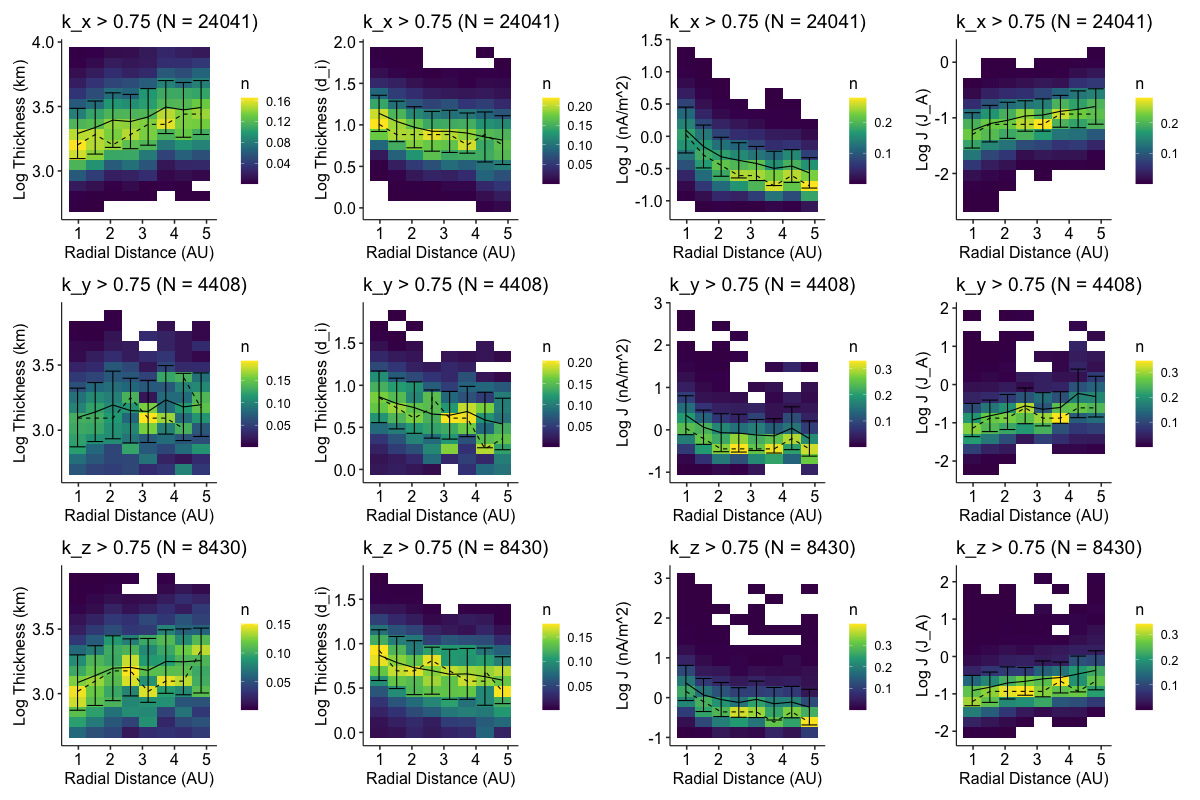

In [42]:
%%R -w 1200 -h 800

cols <- c("k_x", "k_y", "k_z")
plot_effect(JNO_events_l1, cols, y_vars)

We examine the effects of max variation orientation $V_l$ on the evolution of the thickness.

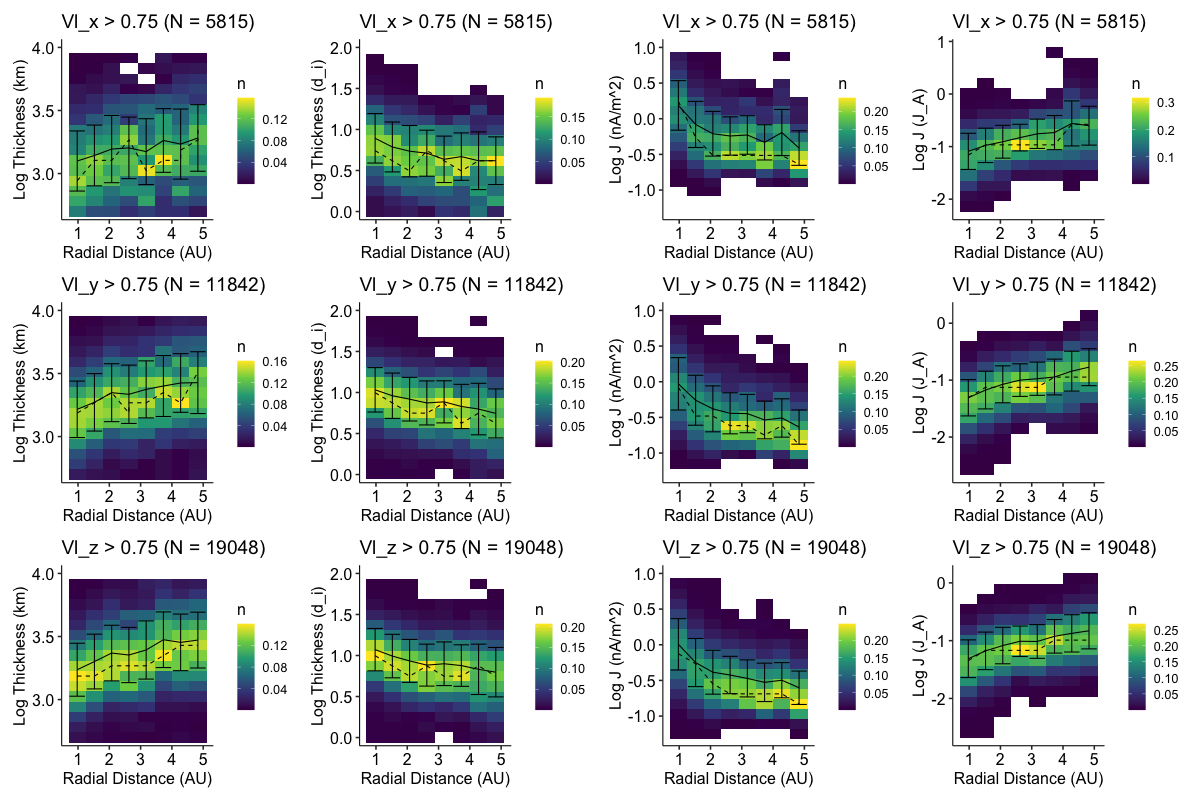

In [13]:
%%R -w 1200 -h 800

cols <- c("Vl_x", "Vl_y", "Vl_z")
plot_effect(JNO_events_l1, cols, y_vars)

We examine the effects of max variation orientation $V_l$ on the evolution of the thickness, now dividing into two groups depending on whether or not out of eclipic plane.

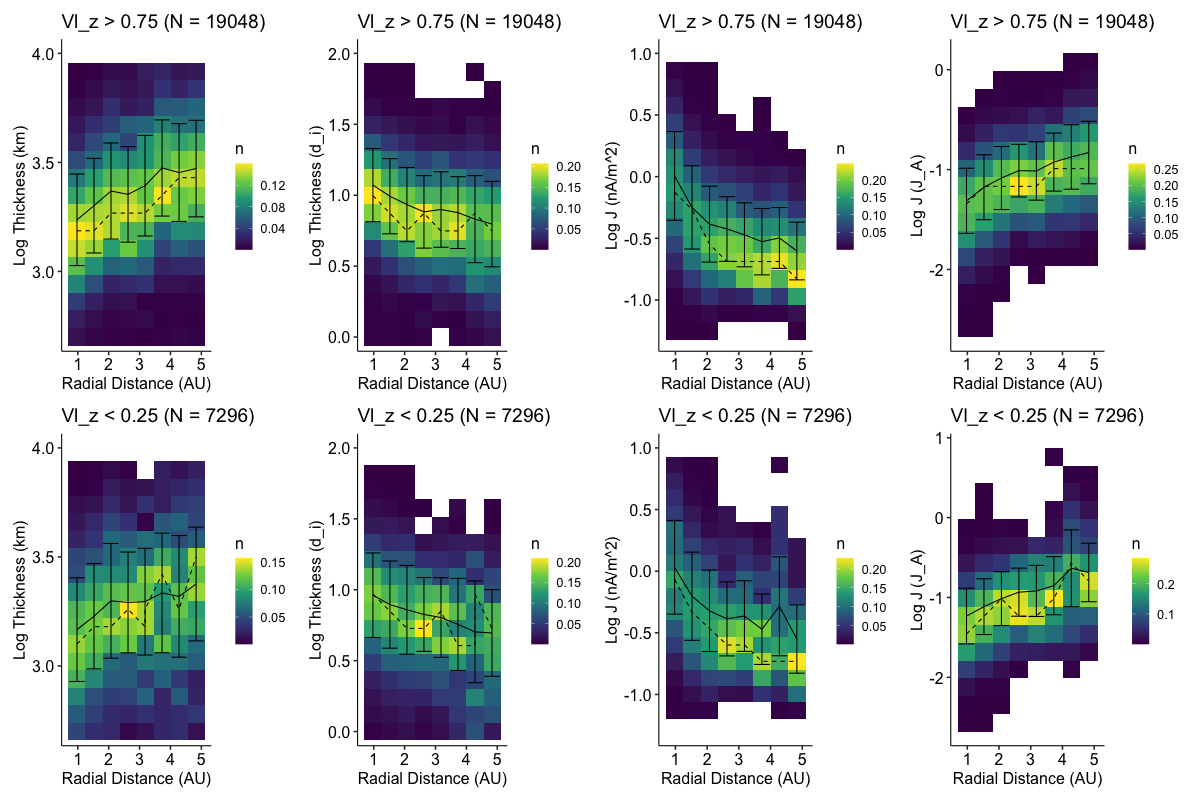

In [24]:
%%R -w 1200 -h 800

cols <- c("Vl_z")

plot_effect(JNO_events_l1, cols, y_vars_l, operators = ">") / plot_effect(JNO_events_l1, cols, y_vars_l, k_threshold = 0.25, operators = "<") |
plot_effect(JNO_events_l1, cols, y_vars_j, operators = ">") / plot_effect(JNO_events_l1, cols, y_vars_j, k_threshold = 0.25, operators = "<")

### Distribution

In [146]:
%%R
y <- "L_mn"
ylab <- "Log Thickness (km)"
y_lim <- c(500,10000)
p1 <- plot_dist(y=y, ylab=ylab, y_lim = y_lim)
save_plot("thickness/thickness_mn_dist")

y <- "L_k"
p2 <- plot_dist(y=y, ylab=ylab, y_lim = y_lim)
save_plot("thickness/thickness_k_dist")


y <- "L_mn_norm"
ylab <- expression(Log~Thickness~(d[i]))
y_lim <- c(1,100)
p3 <- plot_dist(y=y, ylab=ylab, y_lim = y_lim)
save_plot("thickness/thickness_mn_N1_dist")

y <- "L_k_norm"
ylab <- expression(Log~Thickness~(d[i]))
y_lim <- c(1,100)
p4 <- plot_dist(y=y, ylab=ylab, y_lim = y_lim)
save_plot("thickness/thickness_k_N1_dist")

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


### Histogram

In [22]:
%%R
x <- "L_mn_norm"
x_lim <- c(0,60)
bins <- 16
facet_var <- "r_bin"
p <- plot_limited_histogram(all_events_l1, x = x, x_lim = x_lim , bins = bins, facet_var=facet_var)
save_plot("thickness_N1_r_hist")

x <- "L_mn_norm_log"
x_lim <- c(0, 2)
facet_var <- "r_bin"
p <- plot_limited_histogram(all_events_l1, x = x, x_lim = x_lim , bins = bins, facet_var=facet_var)
save_plot("thickness_N1_log_r_hist")

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


Results

![](../figures/thickness_N1_r_hist.png){width=500}
![](../figures/thickness_N1_log_r_hist.png){width=500}


## Current intensity

### Mean value

In [23]:
%%R
x_var <- "time"
y_vars <- c("j0", "j0_norm")
xlab <- "Time"
ylabs <- c("J (nA/m^2)",  "Normalized J (J_A)")
p <- plot_util(all_events_l2, x_var = x_var, y_vars = y_vars, xlab=xlab, ylabs=ylabs)
save_plot("current_time")

x_var <- "ref_radial_distance"
xlab <- "Referred Radial Distance (AU)"
p <- plot_util(all_events_l2, x_var=x_var, y_vars = y_vars, xlab=xlab, ylabs=ylabs)
save_plot("current_r")

y_vars <- c("j0_n2", "j0_norm_n2")
ylabs <- c("Relative J", "Relative normalized J")
p <- plot_util(all_events_l2, x_var=x_var, y_vars = y_vars, xlab=xlab, ylabs=ylabs)
save_plot("current_r_N2")

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


In addition: There were 20 warnings (use warnings() to see them)


Results

![](../figures/current_time.png){width=500}
![](../figures/current_r.png){width=500}
![](../figures/current_r_N2.png){width=500}

### Map

In [129]:

%%R
x_col <- "radial_distance"
y_col <- "j0"
y_lim <- c(0, 15)
xlab <- "Radial Distance (AU)"
ylab <- expression(Log~J~(nA~m^-2))
p <- plot_binned_data(JNO_events_l1, x_col = x_col, y_col = y_col, x_bins = 8, y_bins = 32, y_lim = y_lim, log_y = TRUE)
p <- p + labs(x = xlab, y= ylab)
save_plot("current_r_dist")

y_col <- "j0_norm"
y_lim <- c(0.01, 1)
ylab <- expression(Log~Normalized~J~(J[A]))
p <- plot_binned_data(JNO_events_l1, x_col = x_col, y_col = y_col, x_bins = 8, y_bins = 32, y_lim = y_lim, log_y = TRUE)
p <- p + labs(x = xlab, y= ylab)
save_plot("current_N1_r_dist")

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


### Distribution

In [138]:
%%R
y <- "j0"
ylab <- expression(Log~J~(nA~m^-2))
y_lim <- c(0.01, 15)
p <- plot_dist(y=y, ylab=ylab, y_lim = y_lim)
save_plot("current/current_mn_dist")

y <- "j0_k"
p <- plot_dist(y=y, ylab=ylab, y_lim = y_lim)
save_plot("current/current_k_dist")


y <- "j0_norm"
ylab <- expression(Log~J~(J[A]))
y_lim <- c(0.01, 1)
p <- plot_dist(y=y, ylab=ylab, y_lim = y_lim)
save_plot("current/current_mn_N1_dist")

y <- "j0_k_norm"
p <- plot_dist(y=y, ylab=ylab, y_lim = y_lim)
save_plot("current/current_k_N1_dist")

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


### Histogram

In [25]:
%%R
x <- "j0_norm"
x_lim <- c(0, 1)
facet_var <- "r_bin"
p <- plot_limited_histogram(all_events_l1, x = x, x_lim = x_lim, bins = 8, facet_var=facet_var)
save_plot("current_N1_r_hist")

x <- "j0_norm_log"
x_lim <- c(-2, 0)
p <- plot_limited_histogram(all_events_l1, x = x, x_lim = x_lim, bins = 8, facet_var=facet_var)
save_plot("current_N1_log_r_hist")

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


Results

![](../figures/current_N1_r_hist.png){width=500}
![](../figures/current_N1_log_r_hist.png){width=500}
